In [62]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime

# change the max width of pandas rows and columns to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

## 1 - Load the data from the competition, removing any possible meaningless column.

In [76]:
column_name = list(pd.read_csv("/Users/pelingundogdu/Desktop/BTS-18/DSF/Assignment2/data/TrainingSet.csv").columns)

for i in range(0,len(column_name)):
    if "YR" in column_name[i]:
        column_name[i] = datetime.strptime(str(column_name[i].split(" ", 1)[0]), '%Y').strftime('%Y')
    else:
        column_name[i] = column_name[i]


In [70]:
type(datetime.strptime(str(column_name[1]), '%Y'))

datetime.datetime

In [77]:

file = pd.read_csv("/Users/pelingundogdu/Desktop/BTS-18/DSF/Assignment2/data/TrainingSet.csv")
# Dropped the column which name is "Unnamed: 0"
file.columns = column_name
file = file.drop(columns=[file.columns[0]])

print(len(file))
file.head(2)

195402


,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection


In [6]:
column_names

Index(['Unnamed: 0', '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]', '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]', '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]', '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', 'Country Name', 'Series Code', 'Series Name'], dtype='object')

## 2 - The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [81]:
# Assign the splitted value which dividedby "." to category column
file["category"] = file['Series Code'].str.split('.',1).str[0]
# Defining unique category values with using new created "category" column
category = file.groupby(["category"]).groups.keys()
print(list(category))
print(len(category))

['1', '2', '3', '4', '5', '6', '7', '8', 'AG', 'BG', 'BM', 'BN', 'BX', 'CM', 'DC', 'DT', 'EA', 'EE', 'EG', 'EN', 'EP', 'ER', 'FB', 'FD', 'FI', 'FM', 'FP', 'FR', 'FS', 'GB', 'GC', 'IC', 'IE', 'IP', 'IQ', 'IS', 'IT', 'LP', 'MS', 'NE', 'NV', 'NY', 'PA', 'PX', 'SE', 'SG', 'SH', 'SI', 'SL', 'SM', 'SN', 'SP', 'ST', 'TG', 'TM', 'TT', 'TX', 'VC', 'allsa', 'allsi', 'allsp', 'lm_ub']
62


## 3 - Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

### 3.a - Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns.

In [83]:
def country_series_to_table(country):
    country = file[file["Country Name"] == country]
    new_table = country.set_index("Series Name").T
    # Index name changed with year values
    new_table.index = new_table.index.str.split(' ',1).str[0]
    return(new_table)

country_series_to_table("Turkey").head(3)

Series Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Agriculture value added per worker (constant 2005 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Agriculture, value added (constant LCU)","Agriculture, value added (current LCU)","Agriculture, value added (current US$)","Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide",Alternative and nuclear energy (% of total energy use),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Armed forces personnel (% of total labor force),"Armed forces personnel, total",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average grace period on new external debt 

### 3.b - Write another similar function that receives a series name and returns the countries.

In [84]:
def series_name_to_countries(series_name_value):
    return list(file[file["Series Name"] == series_name_value]["Country Name"])

series_name_to_countries("Alternative and nuclear energy (% of total energy use)")

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Dem. Rep.',
 'Korea, Rep.',
 'Kosovo',
 'Kuwait',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Li

## 4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

In [119]:
len_of_serie = len(series_name_to_countries("Alternative and nuclear energy (% of total energy use)"))
plt.figure(figsize=(12,8))
graph={}
series_name_to_plot = "Alternative and nuclear energy (% of total energy use)"
for i in random.sample(range(1, len_of_serie), 3):
        #print(i)
        country_name = series_name_to_countries(series_name_to_plot)[i]
        graph["graph_{}".format(i)] = country_series_to_table(country_name)
        graph["graph_{}".format(i)]["mean"] = graph["graph_{}".format(i)][series_name_to_plot].rolling(3, center=True).mean()
        plt.plot(graph["graph_{}".format(i)][series_name_to_plot], label=country_name)
        plt.plot(graph["graph_{}".format(i)]["mean"], label=country_name+" rolling mean")
        plt.xticks(graph["graph_{}".format(i)].index[np.arange(0,36,7)])
        plt.legend(loc='upper left');

TypeError: cannot handle this type -> object

<Figure size 864x576 with 0 Axes>

## 5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [78]:
largest_8_country

NameError: name 'largest_8_country' is not defined

In [79]:
largest_8_country_column = "Electricity production from coal sources (kWh)"
series_name_to_countries(largest_8_country_column)

lagest_8_df = pd.DataFrame(columns=["Country", "Max_value"])
for i in range(1, len(series_name_to_countries(largest_8_country_column))):
    country = series_name_to_countries(largest_8_country_column)[i]
    lagest_8_df.loc[i] = [country ,(country_series_to_table(country)[largest_8_country_column].mean())]

largest_8_country = lagest_8_df.sort_values(by=["Max_value"],ascending=False).head(8)

print(largest_8_country)

graph_largest_8={}
plt.figure(figsize=(12,8))
for i in largest_8_country["Country"].index:
    #print(i)
    country_name = largest_8_country["Country"][i]
    graph_largest_8["graph_{}".format(i)] = country_series_to_table(country_name)
    plt.plot(graph_largest_8["graph_{}".format(i)][largest_8_country_column], label=country_name)
    plt.xticks(rotation="vertical")
    plt.legend(loc='upper left');

NameError: name 'series_name_to_countries' is not defined

## 6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

file_wo_na.pct_change()["Namibia"]

file_wo_na.pct_change().min()["Namibia"]>0

file_wo_na["Namibia"]

file_wo_na

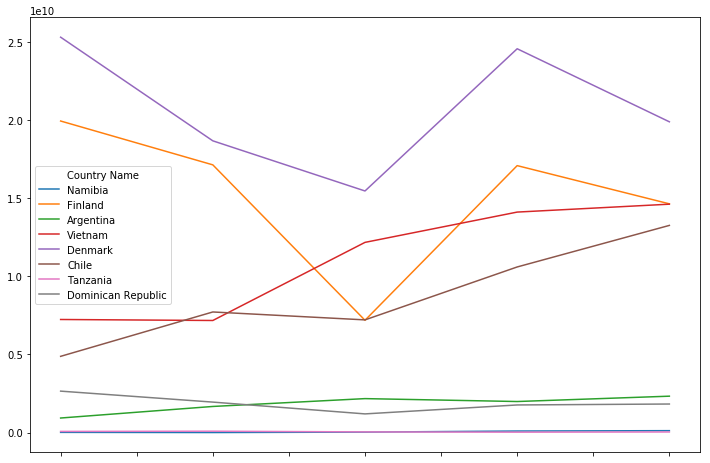

In [8]:
country_year = file[file["Series Name"] == largest_8_country_column].drop(columns=["Series Code", "Series Name", "category"]).set_index("Country Name").T.tail(5)
file_wo_na = country_year.dropna(axis='columns')
file_wo_na = file_wo_na.loc[:, (file_wo_na > 0).all(axis=0)]
file_wo_na.pct_change().max().sort_values(ascending=False).head(8)
last_5  = file_wo_na.pct_change().max().sort_values(ascending=False).head(8).index
file_wo_na = file_wo_na[last_5]
#file_wo_na.pct_change()
file_wo_na.plot(figsize=(12,8))

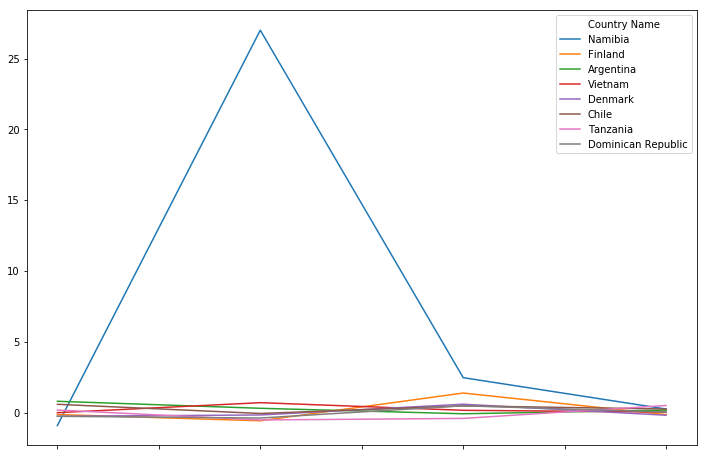

In [9]:
file_wo_na.pct_change().plot(figsize=(12,8))

## 7.Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

all_full = file.loc[~file.isna().any(1)]
all_full_T = all_full.set_index("Series Name").T
all_full.groupby("Country Name").count()

https://en.wikipedia.org/wiki/Health_indicator
https://en.wikipedia.org/wiki/Human_Development_Index

In [87]:
# define which series names have adequied data for countries
all_full = file.loc[~file.isna().any(1)]
sorted_list = pd.DataFrame(all_full.groupby("Series Name").count().sort_values(by=["1972"], ascending=False).iloc[:,0])
sorted_list.columns = ["Number of Country"]
sorted_list[sorted_list.iloc[:,0] > 189].head()

,Number of Country
Series Name,
Adjusted savings: mineral depletion (current US$),214
Adjusted savings: energy depletion (current US$),212
Population (Total),209
Rural population (% of total population),208
Urban population (% of total),208


In [88]:
len(all_full.groupby("Country Name"))

214

In [89]:
#https://pypi.org/project/geonamescache/
import geonamescache
import pandas as pd
import matplotlib.pyplot as plt

gc = geonamescache.GeonamesCache()
cities = gc.get_countries_by_names()

city_continent = pd.DataFrame(pd.DataFrame.from_dict(cities, orient='index', columns=["continentcode"]))
city_continent.index.name = "cities"
city_continent

,continentcode
cities,
Afghanistan,AS
Aland Islands,EU
Albania,EU
Algeria,AF
American Samoa,OC
Andorra,EU
Angola,AF
Anguilla,NA
Antarctica,AN


In [90]:
h1 = "Adolescent fertility rate (births per 1,000 women ages 15-19)"
d1 = "Rural population"#"Secondary education, duration (years)"

h2 = "Fertility rate, total (births per woman)"
d2 = "Population ages 65 and above (% of total)"

h3 = "Life expectancy at birth, total (years)"
d3 = "Urban population"#"Primary education, duration (years)"

countries_q7 = set(series_name_to_countries(h1)) & \
                set(series_name_to_countries(h2)) & \
                set(series_name_to_countries(h3)) & \
                set(series_name_to_countries(d1)) & \
                set(series_name_to_countries(d2)) & \
                set(series_name_to_countries(d3))

file_q7 = file[((file["Series Name"] == d1) |
                (file["Series Name"] == h1) |
                (file["Series Name"] == d2) |
                (file["Series Name"] == h2) |
                (file["Series Name"] == h3) |
                (file["Series Name"] == d3) )
                ]
#len(file_q7)
#len(file_q7[file_q7['Country Name'].isin(countries_q7)])
file_q7 = file_q7[file_q7['Country Name'].isin(countries_q7)]

In [94]:
graph_q7

1972          1973          1974          1975          1976          1977          1978          1979          1980          1981          1982          1983          1984          1985          1986          1987          1988          1989          1990          1991          1992          1993          1994          1995          1996          1997          1998          1999          2000          2001          2002          2003          2004          2005          2006          2007
Series Name                                                   continentcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Adolescent fertility rate (births per 1,000 women ages 15-19) AF             1.368248e+02  1.364347e+02  1.360445e+02  1.356543e+02  1.352642e+02  1.348740e+02  1.338446e+02  1.328151e+02  1.317856e+02  1.307561e+02  1.297267e+02  1.284706e+02  1.272146e+02  1.259585e+02  1.247024e+02  1.234464e+02  1.224967e+02  1.215470e+02  1.205974e+02  1.196477e+02  1.186980e+02  1.175388e+02  1.163797e+02  1.152205e+02  1.140613e+02  1.129021e+02  1.118536e+02  1.108050e+02  1.097565e+02  1.087079e+02  1.076593e+02  1.059557e+02  1.042521e+02  1.025484e+02  1.008448e+02  9.914113e+01
                                                              AS             8.640092e+01  8.494677e+01  8.349262e+01  8.203846e+01  8.058431e+01  7.913016e+01  7.786606e+01  7.660197e+01  7.533787e+01  7.407377e+01  7.280968e+01  7.127097e+01  6.973227e+01  6.819357e+01  6.665487e+01  6.511616e+01  6.362054e+01  6.212491e+01  6.062928e+01  5.913366e+01  5.763803e+01  5.564629e+01  5.365456e+01  5.166282e+01  4.967109e+01  4.767935e+01  4.608391e+01  4.448846e+01  4.289302e+01  4.129758e+01  3.970214e+01  3.873556e+01  3.776898e+01  3.680240e+01  3.583582e+01  3.486924e+01
                                                              EU             3.670594e+01  3.638768e+01  3.606942e+01  3.575116e+01  3.543290e+01  3.511464e+01  3.440442e+01  3.369419e+01  3.298397e+01  3.227375e+01  3.156353e+01  3.102204e+01  3.048056e+01  2.993908e+01  2.939759e+01  2.885611e+01  2.833528e+01  2.781444e+01  2.729361e+01  2.677278e+01  2.625194e+01  2.515510e+01  2.405826e+01  2.296141e+01  2.186457e+01  2.076772e+01  1.999915e+01  1.923058e+01  1.846201e+01  1.769343e+01  1.692486e+01  1.669709e+01  1.646933e+01  1.624156e+01  1.601379e+01  1.578603e+01
                                                              NA             1.134772e+02  1.115697e+02  1.096622e+02  1.077548e+02  1.058473e+02  1.039398e+02  1.027554e+02  1.015711e+02  1.003867e+02  9.920236e+01  9.801800e+01  9.677922e+01  9.554044e+01  9.430166e+01  9.306288e+01  9.182410e+01  9.087846e+01  8.993282e+01  8.898718e+01  8.804154e+01  8.709590e+01  8.570836e+01  8.432082e+01  8.293328e+01  8.154574e+01  8.015820e+01  7.839130e+01  7.662440e+01  7.485750e+01  7.309060e+01  7.132370e+01  6.999796e+01  6.867222e+01  6.734648e+01  6.602074e+01  6.469500e+01
                                                              OC             7.965475e+01  7.808073e+01  7.650672e+01  7.493270e+01  7.335868e+01  7.178467e+01  7.003252e+01  6.828037e+01  6.652822e+01  6.477607e+01  6.302392e+01  6.185453e+01  6.068515e+01  5.951577e+01  5.834639e+01  5.717700e+01  5.601142e+01  5.484583e+01  5.368025e+01  5.251467e+01  5.134908e+01  5.021508e+01  4.908108e+01  4.794708e+01  4.681309e+01  4.567908e+01  4.473723e+01  4.379538e+01  4.285353e+01  4.191168e+01  4.096983e+01  4.048380e+01  3.999777e+01  3.951173e+01  3.902570e+01  3.853967e+01
                         

In [116]:
#list(file_q7[~file_q7['Country Name'].isin(countries_q7)].groupby("Country Name").groups.keys())
file_q7_continent = file_q7.merge(city_continent, left_on='Country Name', right_on='cities', how='left')
graph_q7 = file_q7_continent.groupby(["Series Name","continentcode"]).agg("mean")
#graph_q7 = file_q7_continent.groupby(["Series Name"]).agg("mean")
graph_q7.columns = graph_q7.columns.str.split(" ", 0).str[0]
graph_q7.T

Series Name   Adolescent fertility rate (births per 1,000 women ages 15-19)                                                         Fertility rate, total (births per woman)                                                   Life expectancy at birth, total (years)                                                        Population ages 65 and above (% of total)                                                    Rural population                                                                      Urban population                                                                     
continentcode                                                            AF         AS         EU          NA         OC         SA                                       AF        AS        EU        NA        OC        SA                                      AF         AS         EU         NA         OC         SA                                        AF        AS         EU        NA        OC        SA               AF            AS            EU          NA             OC            SA               AF            AS            EU           NA            OC            SA
1972           136.824813                                                    86.400919  36.705944  113.477200  79.654750  90.529909  6.768723                                 5.677595  2.355314  4.616450  5.040369  4.903636  46.522066                               58.555158  70.885525  63.848746  60.471102  60.910543  3.179102                                  4.006199  10.658435  4.977555  3.756361  4.630803  5.182147e+06     4.398973e+07  5.193681e+06  5392461.50  473161.916667  6.782247e+06  1.437263e+06     1.323626e+07  9.366171e+06  11200150.90  1.199141e+06  1.042053e+07
1973           136.434658                                                    84.946768  36.387683  111.569720  78.080733  89.836691  6.773213                                 5.585324  2.267714  4.506500  4.919345  4.804273  46.999587                               58.896177  71.053032  64.238215  60.862990  61.277756  3.182994                                  4.030214  10.819463  5.060566  3.793587  4.675031  5.285905e+06     4.486998e+07  5.168935e+06  5451886.65  480174.500000  6.801473e+06  1.506341e+06     1.366081e+07  9.480935e+06  11397439.35  1.223134e+06  1.079113e+07
1974           136.044504                                                    83.492616  36.069422  109.662240  76.506717  89.143473  6.772340                                 5.478946  2.250857  4.402600  4.834655  4.704455  47.478545                               59.223699  71.257259  64.630167  61.285654  61.652865  3.188494                                  4.051265  10.979817  5.150944  3.837724  4.722930  5.393046e+06     4.573267e+07  5.142717e+06  5509359.50  488876.833333  6.817037e+06  1.578823e+06     1.411212e+07  9.590857e+06  11595459.60  1.257640e+06  1.117183e+07
1975           135.654350                                                    82.038464  35.751161  107.754760  74.932698  88.450256  6.765702                                 5.372081  2.216486  4.302150  4.734714  4.603545  47.958183                               59.576013  71.390334  65.023234  61.711411  62.038195  3.196797                                  4.071615  11.143519  5.250333  3.887898  4.774500  5.503784e+06     4.655084e+07  5.116916e+06  5567590.50  495336.666667  6.829506e+06  1.655112e+06     1.455714e+07  9.695770e+06  11802369.50  1.279731e+06  1.156348e+07
1976           135.264195                                                    80.584313  35.432900  105.847281  73.358682  87.757040  6.706625                                 5.275838  2.168629  4.206900  4.668524  4.501091  48.439441                               59.967492  71.595754  65.385254  62.133980  62.436519  3.208146                                  4.093640  11.317002  5.360196  3.945255  4.830344  5.617239e+06     4.723613e+07  5.095478e+06  5622605.15  504052.750000  6.842201e+06  1.73

In [107]:
colum1 = graph_q7.T["Adolescent fertility rate (births per 1,000 women ages 15-19)"]

No handles with labels found to put in legend.


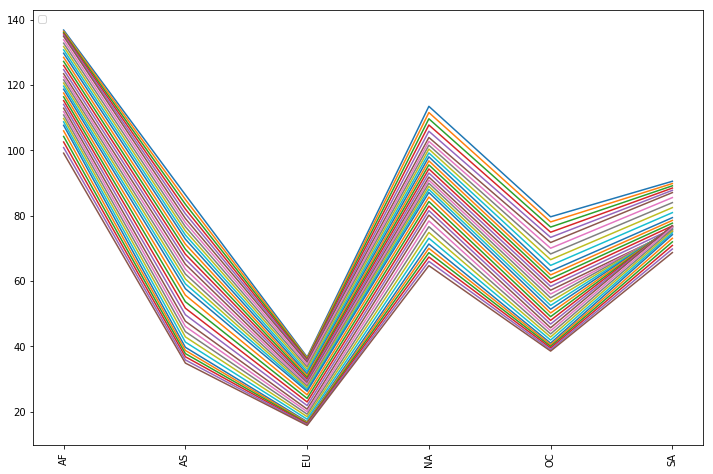

In [118]:
plt.figure(figsize=(12,8))
plt.xticks(rotation="vertical")
plt.legend(loc="upper left")
plt.plot(colum1.T);


TypeError: ('Adolescent fertility rate (births per 1,000 women ages 15-19)', 'AF') is not a string

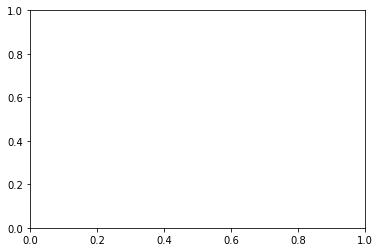

In [15]:
cs = {'AF':'red',
      'AS':'blue',
      'EU':'green',
      'NA':'maroon',
      'OC':'black',
      'SA':'yellow'
     }

markers = ('*','o','>','+','-','2') 
fig, ax = subplots(figsize = (12,8))

for region, marker in zip(set(deneme.Region),cycle(markers)):
    reg_data = deneme[deneme.Region==region]
    reg_data.plot(x='X', y='Y',
          kind='scatter',
          ax=ax,
          c=[cs[x] for x in reg_data.Type],
          marker=marker,
          label=region)



plt.plot(graph_q7)

TypeError: ('Adolescent fertility rate (births per 1,000 women ages 15-19)', 'AF') is not a string

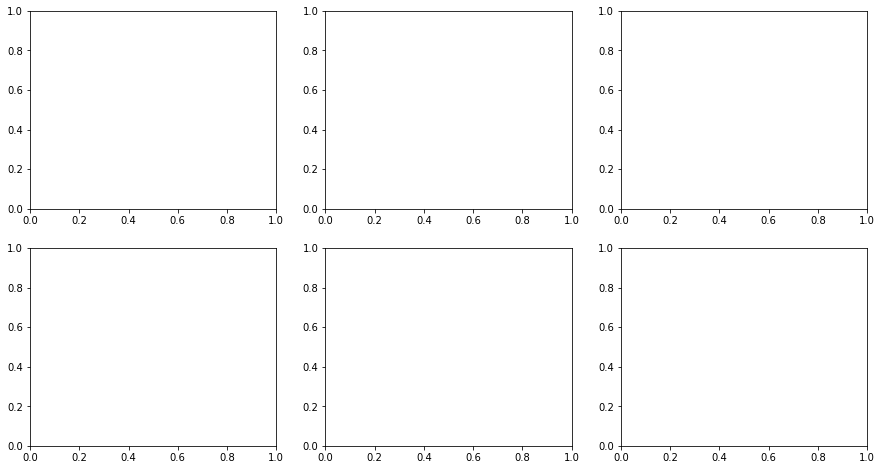

In [29]:
plt.subplots(nrows=2,ncols=3,figsize=(15,8))
plt.plot(graph_q7)

#SILMEEE
# for visualization
h1 = "Adolescent fertility rate (births per 1,000 women ages 15-19)"
d1 = "Rural population"#"Secondary education, duration (years)"

h2 = "Fertility rate, total (births per woman)"
d2 = "Population ages 65 and above (% of total)"

h3 = "Life expectancy at birth, total (years)"
d3 = "Urban population"#"Primary education, duration (years)"

countries_q7 = set(series_name_to_countries(h1)) & \
                set(series_name_to_countries(h2)) & \
                set(series_name_to_countries(h3)) & \
                set(series_name_to_countries(d1)) & \
                set(series_name_to_countries(d2)) & \
                set(series_name_to_countries(d3))

type(list(countries_q7))


### Questions 1 to 6 are worth 0.5 points each, question 7 is totally open (no correct answers) and is worth 2 points, which will include overall presentation and aesthetics.

In [71]:
file["1972 [YR1972]"][3]

nan

In [4]:
#type(file.groupby(["Series Name"]).groups.keys())
series_name = file.groupby(["Series Name"]).groups.keys()
check_row = file.groupby(["Country Name"])["Series Code"].count()
sum(check_row)

195402

deneme - DO NOT SEND

In [ ]:
#deneme
df2 = pd.DataFrame()

for i in range(len(file)):
    if (file.iloc[:, np.r_[1:37]]).iloc[1].isna().values.sum() == 0:
        df2.append(file.iloc[i])
        

In [38]:
#deneme - Yeni bir dataframe olusturarak istenilen kosulu yeni tanimlanan kolona atiyor
file2 = pd.DataFrame(file['Series Code'].str.split('.',1).tolist(),
                                   columns = ['category','Series Code'])

file2.head()

In [ ]:
#deneme istenilen kosula gore tablodan satir siliyor
for i in range(0,len(file)):
    #print ((file.iloc[:, np.r_[1:37]]).iloc[i].isna().values.sum() )
    if (file.iloc[:, np.r_[1:37]].iloc[i].isna().values.sum()) > 0:
        df = df.drop(i).copy()
        #print(file.index[i])

In [119]:
#file["Series Name"].value_counts()
#list(series_name)
#file.iloc[:, np.r_[1:37]].head()


#for col in range(1972, 1974):
#    column_name = str(col) + " [YR" + str(col) + "]"
#    for i in range(3):
#        print(file[column_name][i])

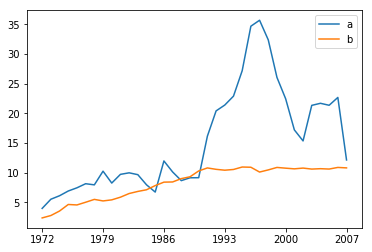

In [149]:
#deneme
graph1 = country_series("Albania")
graph2 = country_series("United States")
plt.plot(graph1["Alternative and nuclear energy (% of total energy use)"], label="Albania")
plt.plot(graph2["Alternative and nuclear energy (% of total energy use)"], label="United States")

plt.xticks(graph1.index[np.arange(0,36,7)]);
plt.xticks(graph2.index[np.arange(0,36,7)]);

plt.legend(loc='upper right')

In [25]:
#deneme
graph.keys()

graph["graph_33"].head()

graph["graph_49"]["Alternative and nuclear energy (% of total energy use)"].rolling(3, center=True).mean().head()

graph["graph_33"]["Alternative and nuclear energy (% of total energy use)"].head()

dict_keys(['graph_117', 'graph_43', 'graph_77'])